In [56]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('Loan(Logistic Regression).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [58]:
df.drop(['Loan_ID'] , axis = 1, inplace = True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


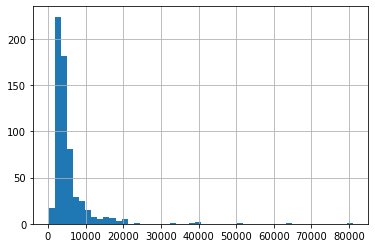

In [60]:
df['ApplicantIncome'].hist(bins=50)

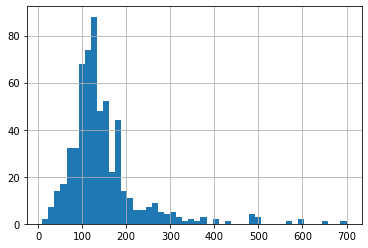

In [61]:
df['LoanAmount'].hist(bins=50)

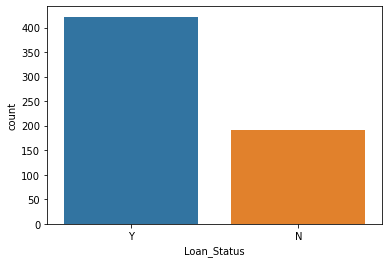

In [62]:
sns.countplot('Loan_Status',data=df)

## Missing Values


![title](img/missing.jpeg)

In [63]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [64]:
lst_data=[[1,2,3],[3,4,np.nan],[5,6,np.nan],[2,np.nan,np.nan]]
df_try=pd.DataFrame(lst_data)
df_try.head()

,0,1,2
0,1,2.0,3.0
1,3,4.0,NaN
2,5,6.0,NaN
3,2,NaN,NaN


In [65]:
df_try.dropna(axis=0)

,0,1,2
0,1,2.0,3.0


In [66]:
df_try.fillna('Missing')

,0,1,2
0,1,2,3
1,3,4,Missing
2,5,6,Missing
3,2,Missing,Missing


In [67]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Self_Employed'].fillna('No',inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [68]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [69]:
df['income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [70]:
df.drop(['ApplicantIncome','CoapplicantIncome'],axis =1,inplace = True)

In [71]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0


## LabelEncoding

![title](img\LE.png)

In [96]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Gender                int64
Married               int64
Dependents            int64
Education             int64
Self_Employed         int64
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area         int64
Loan_Status           int64
income              float64
dtype: object

In [97]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income
0,1,0,0,0,0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,141.000000,360.0,1.0,2,1,6000.0


In [98]:
from sklearn.model_selection import train_test_split
X = df.drop(['Loan_Status'],axis =1)
Y = df['Loan_Status']

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.25)

In [99]:
from sklearn.linear_model import LogisticRegression

In [146]:
model=LogisticRegression(C=0.9)
model.fit(train_X,train_Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.9)

## Logistic Regression Graph

![title](img\LR_plot.png)

In [147]:
pred_y=model.predict(test_X)

In [148]:
test_X

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,income
124,1,1,0,1,0,194.0,360.0,1.0,0,6314.0
565,1,1,0,1,0,120.0,360.0,1.0,0,4467.0
142,1,0,0,0,1,175.0,180.0,1.0,1,6950.0
535,1,0,0,1,0,126.0,360.0,1.0,0,4592.0
568,0,0,0,0,0,9.0,360.0,1.0,2,2378.0
...,...,...,...,...,...,...,...,...,...,...
231,1,1,0,0,0,42.0,180.0,1.0,0,3716.0
443,1,0,1,0,0,152.0,360.0,1.0,1,37719.0
393,1,1,2,1,0,113.0,180.0,1.0,1,3618.0
233,0,0,0,0,0,280.0,360.0,1.0,1,8333.0


In [149]:
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [150]:
test_Y

124    1
565    1
142    1
535    1
568    0
      ..
231    1
443    1
393    1
233    1
60     1
Name: Loan_Status, Length: 154, dtype: int64

In [151]:
df2 = pd.DataFrame({'Actual': test_Y, 'Predicted': pred_y.flatten()})
df2

,Actual,Predicted
124,1,1
565,1,1
142,1,1
535,1,1
568,0,1
...,...,...
231,1,1
443,1,1
393,1,1
233,1,1


In [152]:
from sklearn import metrics


## Confusion Matrix

![title](img/confusionMatrxiUpdated.jpg)

In [153]:
metrics.confusion_matrix(pred_y,test_Y)

array([[ 24,   0],
       [ 24, 106]], dtype=int64)

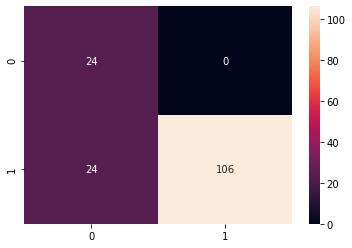

In [161]:
sns.heatmap(metrics.confusion_matrix(pred_y,test_Y), annot=True,fmt='d')

In [162]:
metrics.accuracy_score(pred_y,test_Y)

0.8441558441558441